In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
pokedex_dir="../dataset"

In [3]:
pokedex_datagen=ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.1,
                                   rotation_range=0.2,
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   horizontal_flip=True,vertical_flip=True,
                                   dtype="uint8",
                                   validation_split=0.3
                                   )

In [31]:
pokedex_dataset=pokedex_datagen.flow_from_directory(pokedex_dir,target_size=(256,256))


Found 22133 images belonging to 152 classes.


In [21]:
num_classes=len(os.listdir(pokedex_dir))
num_classes

152

In [11]:
def get_num_imgs(img_path, limit):
    class_img_count = {}

    for class_name in os.listdir(img_path):
        class_path = os.path.join(img_path, class_name)

        if os.path.isdir(class_path):
            img_count = sum(1 for file in os.listdir(class_path) if file.endswith('.png') or file.endswith('.jpeg') or file.endswith('.jpg'))
            class_img_count[class_name] = img_count
    
        
    class_img_count_subset = dict(list(class_img_count.items())[limit-10:limit])
        

    plt.bar(class_img_count_subset.keys(), class_img_count_subset.values())
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images in First {limit} Classes')
    plt.xticks(rotation=45)
    plt.show()
        

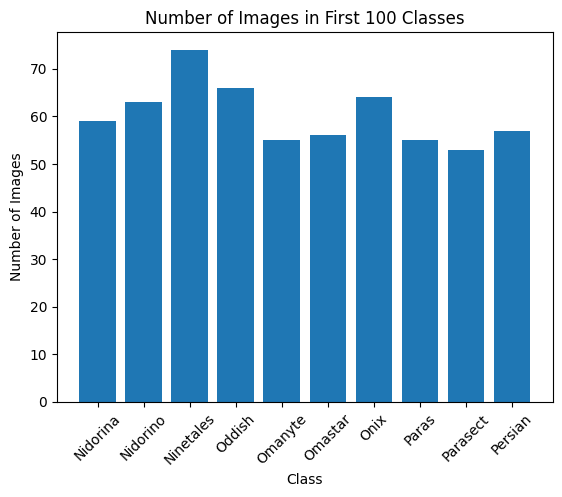

In [12]:
get_num_imgs(pokedex_dir,100)

In [14]:
# pokedex_model = tf.keras.models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(num_classes, activation='softmax')
# ])

## @Todo:
1) build a model that compiles the model and plots the efficiency after a range of parameters

def build_model(num_classes:int,input_shape:tuple=None,  num_conv_layers_range=None):
    if num_conv_layers_range is None:
        num_conv_layers_range = [1, 2, 3]
    if input_shape is None:
        input_shape = (256,256,3)
    history=[]
    '''
    Build model:
        history=[{
            numlayers: 
            accuracy:
        }]
    '''
    
    for num_layers in num_conv_layers_range:
        model = Sequential()
        i=0
        while num_layers > 0:
            model.add(Conv2D(filters=(2**(4+i)),kernel_size=(3,3),activation="relu",input_shape=input_shape))
            model.add(MaxPooling2D(pool_size=(2,2)))
            i+=1
            num_layers -= 1
        model.add(Flatten())
        model.add(Dense(256,activation="relu"))
        model.add(Dropout(0.3))
        model.add(Dense(128,activation="relu"))
        model.add(Dense(num_classes,activation="softmax"))
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
        history=model.fit(x=pokedex_dataset,batch_size=32,epochs=30,steps_per_epoch=692)
        print(history.history.keys())
        

In [35]:
# build_model(num_classes,input_shape=(256,256,3),num_conv_layers_range=[3])

In [32]:
pokedex_dataset.image_shape

(256, 256, 3)

In [38]:
def build_model(num_classes,input_shape=(256,256,3)):
    history=[] 
    model=Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(128,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes,activation="softmax"))
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
    return model



In [39]:
model=build_model(num_classes,input_shape=(256,256,3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 246016)            0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [ ]:
def train_model(model:tf.keras.models.Sequential, train_dataset: tf.data.Dataset,batch_sizes:list):
    history
    for batch_size in batch_sizes:
        